<a href="https://colab.research.google.com/github/palakjain0609/Internshipandplacementportal/blob/main/vendor_inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!ls


drive  sample_data


In [21]:
!ls



drive  sample_data


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!mv /content/sales.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/sales.csv': No such file or directory


In [24]:
!mv /content/purchases.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/purchases.csv': No such file or directory


In [25]:
!mv /content/begin_inventory.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/begin_inventory.csv': No such file or directory


In [26]:
!mv /content/end_inventory.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/end_inventory.csv': No such file or directory


In [27]:
!mv /content/purchase_price.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/purchase_price.csv': No such file or directory


In [28]:
!mv /content/vendor_invoice.csv /content/drive/MyDrive/data/


mv: cannot stat '/content/vendor_invoice.csv': No such file or directory


In [29]:
!ls /content/drive/MyDrive/data


begin_inventory.csv  purchase_prices.csv  sales.csv
end_inventory.csv    purchases.csv	  vendor_invoice.csv


In [30]:
import sqlite3
import pandas as pd
import os
import time

In [31]:
db_path = "inventory.db"


In [32]:
db_path = "/content/drive/MyDrive/inventory.db"


In [33]:
conn = sqlite3.connect(db_path)
print("Database created at:", db_path)



Database created at: /content/drive/MyDrive/inventory.db


In [34]:
conn = sqlite3.connect(db_path)

df_purchases = pd.read_csv("/content/drive/MyDrive/data/purchases.csv")

df_purchases.to_sql(
    name="purchases",
    con=conn,
    if_exists="replace",
    index=False
)

conn.close()
print("purchases table created")


purchases table created


In [35]:
conn = sqlite3.connect(db_path)

df_purchase_prices = pd.read_csv("/content/drive/MyDrive/data/purchase_prices.csv")

df_purchase_prices.to_sql(
    name="purchase_prices",
    con=conn,
    if_exists="replace",
    index=False
)

conn.close()
print("purchase_prices table created")


purchase_prices table created


In [36]:
conn = sqlite3.connect(db_path)

df_vendor_invoice = pd.read_csv("/content/drive/MyDrive/data/vendor_invoice.csv")

df_vendor_invoice.to_sql(
    name="vendor_invoice",
    con=conn,
    if_exists="replace",
    index=False
)

conn.close()
print("vendor_invoice table created")


vendor_invoice table created


In [37]:
conn = sqlite3.connect(db_path)

df_begin_inventory = pd.read_csv("/content/drive/MyDrive/data/begin_inventory.csv")

df_begin_inventory.to_sql(
    name="begin_inventory",
    con=conn,
    if_exists="replace",
    index=False
)

conn.close()
print("begin_inventory table created")


begin_inventory table created


In [38]:
conn = sqlite3.connect(db_path)

df_end_inventory = pd.read_csv("/content/drive/MyDrive/data/end_inventory.csv")

df_end_inventory.to_sql(
    name="end_inventory",
    con=conn,
    if_exists="replace",
    index=False
)

conn.close()
print("end_inventory table created")

end_inventory table created


In [39]:
data_dir = "/content/drive/MyDrive/data"
conn = sqlite3.connect(db_path)

for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        table_name = file.replace(".csv", "")
        file_path = os.path.join(data_dir, file)

        df = pd.read_csv(file_path)
        df.to_sql(table_name, conn, if_exists="replace", index=False)

        print(f"Loaded {file} → table `{table_name}`")

conn.close()


Loaded purchase_prices.csv → table `purchase_prices`
Loaded begin_inventory.csv → table `begin_inventory`
Loaded end_inventory.csv → table `end_inventory`
Loaded purchases.csv → table `purchases`
Loaded sales.csv → table `sales`
Loaded vendor_invoice.csv → table `vendor_invoice`


In [40]:
conn = sqlite3.connect(db_path)

tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

print(tables)
conn.close()


                   name
0      purchases_prices
1  vendor_sales_summary
2       purchase_prices
3       begin_inventory
4         end_inventory
5             purchases
6                 sales
7        vendor_invoice


In [43]:
conn = sqlite3.connect(db_path)

query = """
SELECT VendorName,
       SUM(Dollars) AS TotalSpend,
       SUM(Quantity) AS TotalUnits
FROM purchases
GROUP BY VendorName
ORDER BY TotalSpend DESC
LIMIT 10;
"""

result = pd.read_sql(query, conn)

result


,VendorName,TotalSpend,TotalUnits
0,MARTIGNETTI COMPANIES,185155.60,16075.0
1,DIAGEO NORTH AMERICA INC,180644.92,16602.0
2,JIM BEAM BRANDS COMPANY,151890.49,11611.0
3,BACARDI USA INC,137483.78,10100.0
4,PERNOD RICARD USA,80916.64,5772.0
5,M S WALKER INC,68620.75,8061.0
6,BROWN-FORMAN CORP,65403.57,4684.0
7,CONSTELLATION BRANDS INC,60281.13,8466.0
8,SAZERAC CO INC,57738.64,6283.0
9,E & J GALLO WINERY,56493.23,8086.0


In [44]:
conn = sqlite3.connect(db_path)
tables = conn.execute(
    "SELECT name FROM sqlite_master WHERE type='table';"
).fetchall()

print(tables)


[('purchases_prices',), ('vendor_sales_summary',), ('purchase_prices',), ('begin_inventory',), ('end_inventory',), ('purchases',), ('sales',), ('vendor_invoice',)]


In [45]:
conn = sqlite3.connect(db_path)

for (table_name,) in tables:
    print('-' * 50, table_name, '-' * 50)

    count = pd.read_sql(
        f"SELECT COUNT(*) FROM {table_name}",
        conn
    ).iloc[0, 0]

    print("Count of records:", count)

    display(
        pd.read_sql(
            f"SELECT * FROM {table_name} LIMIT 5",
            conn
        )
    )


-------------------------------------------------- purchases_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 2179


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,2550.0,40927.50,770.0,16932.30,5123.67,1414.73,123880.97,-23995.20,-58.628550,0.301961,0.413714
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,2418.0,34263.06,1879.0,33803.21,5720.82,3452.40,89286.27,-459.85,-1.342116,0.777089,0.986579
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69,3.207349,0.764483,1.032073
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83,65.253241,1.277834,1.652532
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37,279.814890,2.792909,3.798149


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 12577


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 12573


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11.0,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7.0,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7.0,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4.0,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7.0,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 6888


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105.0,ALTAMAR BRANDS LLC,8124.0,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388.0,ATLANTIC IMPORTING COMPANY,8169.0,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5.0,106.60,1.0


-------------------------------------------------- sales --------------------------------------------------
Count of records: 178149


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1.0,1004.0,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,2024-01-01,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1.0,1004.0,Jim Beam w/2 Rocks Glasses,750mL,2.0,32.98,16.49,2024-01-02,750.0,1.0,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1.0,1004.0,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,2024-01-03,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1.0,1004.0,Jim Beam w/2 Rocks Glasses,750mL,1.0,14.49,14.49,2024-01-08,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1.0,1005.0,Maker's Mark Combo Pack,375mL 2 Pk,2.0,69.98,34.99,2024-01-09,375.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [46]:
import sqlite3
con = sqlite3.connect(db_path)
cursor = con.cursor()

In [47]:
conn = sqlite3.connect(db_path)
purchase_prices = pd.read_sql('SELECT * FROM purchase_prices where VendorNumber = 4466', conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [48]:
vendor_invoice = pd.read_sql_query('SELECT * FROM vendor_invoice where VendorNumber = 4466', conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [49]:
sales = pd.read_sql_query('SELECT * FROM sales where VendorNo= 4466', conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1.0,5215.0,TGI Fridays Long Island Iced,1.75L,1.0,12.99,12.99,2024-01-09,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1.0,5215.0,TGI Fridays Long Island Iced,1.75L,1.0,12.99,12.99,2024-01-12,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1.0,5215.0,TGI Fridays Long Island Iced,1.75L,1.0,12.99,12.99,2024-01-15,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1.0,5215.0,TGI Fridays Long Island Iced,1.75L,1.0,12.99,12.99,2024-01-21,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1.0,5215.0,TGI Fridays Long Island Iced,1.75L,1.0,12.99,12.99,2024-01-23,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,23_ARBINGTON_5255,23.0,5255.0,TGI Fridays Ultimte Mudslide,1.75L,1.0,12.99,12.99,2024-01-12,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
71,23_ARBINGTON_5255,23.0,5255.0,TGI Fridays Ultimte Mudslide,1.75L,1.0,12.99,12.99,2024-01-14,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
72,23_ARBINGTON_5255,23.0,5255.0,TGI Fridays Ultimte Mudslide,1.75L,1.0,12.99,12.99,2024-01-22,1750.0,1.0,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
73,23_ARBINGTON_5255,23.0,5255.0,TGI Fridays Ultimte Mudslide,1.75L,2.0,25.98,12.99,2024-01-23,1750.0,1.0,3.67,4466.0,AMERICAN VINTAGE BEVERAGE


In [50]:
purchases = pd.read_sql_query('SELECT * FROM purchases', conn)
display(purchases.head())

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105.0,ALTAMAR BRANDS LLC,8124.0,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388.0,ATLANTIC IMPORTING COMPANY,8169.0,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5.0,106.60,1.0


In [51]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
5215.0,519.60,441.66,40.0
5255.0,675.48,532.59,52.0


In [52]:
freight_summary = pd.read_sql_query('SELECT VendorNumber, SUM(Freight) as FreightCost FROM vendor_invoice GROUP BY VendorNumber', conn)
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [53]:
pd.read_sql_query('SELECT p.VendorNumber, p.VendorName, p.Brand, p.PurchasePrice, pp.Volume, pp.Price as ActualPrice, Sum(Quantity) as TotalPurchaseQuantity, SUM(Dollars) as TotalPurchaseDollars FROM purchases p JOIN purchase_prices pp ON p.Brand = pp.Brand Where p.PurchasePrice > 0 GROUP BY p.VendorNumber, p.VendorName, p.Brand ORDER BY TotalPurchaseDollars', conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1392.0,CONSTELLATION BRANDS INC,28579,3.24,750,7.99,1.0,3.24
1,4425.0,MARTIGNETTI COMPANIES,27934,3.37,750,4.99,1.0,3.37
2,3960.0,DIAGEO NORTH AMERICA INC,3917,0.79,50,0.99,7.0,5.53
3,8004.0,SAZERAC CO INC,5877,0.62,50,0.99,9.0,5.58
4,12546.0,JIM BEAM BRANDS COMPANY,8172,0.71,50,0.99,9.0,6.39
...,...,...,...,...,...,...,...,...
2174,3960.0,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,1241.0,20066.97
2175,4425.0,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,997.0,23120.43
2176,480.0,BACARDI USA INC,3858,17.77,750,23.99,1847.0,32821.19
2177,480.0,BACARDI USA INC,4227,14.17,1750,17.99,2418.0,34263.06


In [54]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [55]:
pd.read_sql_query('SELECT VendorNo, Brand, SUM(SalesDollars) as TotalSalesDollars, SUM(SalesPrice) as TotalSalesPrice, SUM(SalesQuantity) as TotalSalesQuantity, SUM(ExciseTax) as TotalExciseTax FROM sales GROUP BY VendorNo, Brand ORDER BY TotalSalesDollars', conn)


,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,NaN,NaN,NaN,NaN,NaN,NaN
1,8004.0,5287.0,0.49,0.49,1.0,0.05
2,3960.0,8065.0,0.99,0.99,1.0,0.05
3,7245.0,3065.0,0.99,0.99,1.0,0.05
4,3960.0,4173.0,1.98,0.99,2.0,0.10
...,...,...,...,...,...,...
4810,4425.0,3405.0,38207.26,9596.80,1274.0,2340.71
4811,17035.0,8068.0,46374.06,9499.33,1794.0,3296.17
4812,3960.0,3545.0,54427.94,9778.76,1806.0,3318.30
4813,1128.0,1233.0,56324.35,12272.59,1565.0,2875.36


In [56]:
start = time.time()
final_table = pd.read_sql_query("""SELECT
    pp.VendorNumber,
    pp.Brand,
    pp.Price as ActualPrice,
    pp.PurchasePrice,
    SUM(s.SalesQuantity) AS TotalSalesQuantity,
    SUM(s.SalesDollars) AS TotalSalesDollars,
    SUM(s.SalesPrice) AS TotalSalesPrice,
    SUM(s.ExciseTax) AS TotalExciseTax,
    SUM(vi.Quantity) AS TotalPurchaseQuantity,
    SUM(vi.Dollars) AS TotalPurchaseDollars,
    SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
    ON pp.VendorNumber = s.VendorNo
    AND pp.Brand = s.Brand
JOIN vendor_invoice vi
    ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
""",conn)
end = time.time()


In [57]:
vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),
PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),
SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
) -- Removed the trailing comma here

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)

In [58]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,2550.0,40927.50,770.0,16932.30,5123.67,1414.73,123880.97
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750,2418.0,34263.06,1879.0,33803.21,5720.82,3452.40,89286.27
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,12546.0,JIM BEAM BRANDS COMPANY,8172,DK Burst Blustery Peppermint,0.71,0.99,50,9.0,6.39,602.0,595.98,135.63,31.48,123880.97
2175,8004.0,SAZERAC CO INC,5877,Ryans Irish Cream,0.62,0.99,50,9.0,5.58,568.0,562.32,158.40,29.55,50293.62
2176,3960.0,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50,7.0,5.53,111.0,109.89,39.60,5.74,257032.07
2177,4425.0,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750,1.0,3.37,NaN,NaN,NaN,NaN,144929.24


In [59]:
vendor_sales_summary.dtypes

,0
VendorNumber,float64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,float64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [60]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,119


In [61]:
vendor_sales_summary['VendorName'].unique()

array(['JIM BEAM BRANDS COMPANY    ', 'BACARDI USA INC            ',
       'MARTIGNETTI COMPANIES', 'DIAGEO NORTH AMERICA INC   ',
       'E & J GALLO WINERY         ', 'SAZERAC CO INC             ',
       'BROWN-FORMAN CORP          ', 'PROXIMO SPIRITS INC.       ',
       'PERNOD RICARD USA          ', 'M S WALKER INC             ',
       'BANFI PRODUCTS CORP        ', 'MOET HENNESSY USA INC      ',
       'CONSTELLATION BRANDS INC   ', 'DIAGEO CHATEAU ESTATE WINES',
       'STE MICHELLE WINE ESTATES  ', 'SOUTHERN WINE & SPIRITS NE ',
       'PERFECTA WINES             ', 'PINE STATE TRADING CO      ',
       'CAMPARI AMERICA            ', 'MAJESTIC FINE WINES        ',
       'EDRINGTON AMERICAS         ', 'FREDERICK WILDMAN & SONS   ',
       'SAZERAC NORTH AMERICA INC. ', 'CASTLE BRANDS CORP.        ',
       'DISARONNO INTERNATIONAL LLC', 'REMY COINTREAU USA INC     ',
       'HEAVEN HILL DISTILLERIES   ', 'SIDNEY FRANK IMPORTING CO  ',
       'STATE WINE & SPIRITS   ', 'DELIC

In [62]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')

In [63]:
vendor_sales_summary.fillna(0,inplace=True)

In [64]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [65]:
vendor_sales_summary['GrossProfit']=vendor_sales_summary['TotalSalesDollars']-vendor_sales_summary['TotalPurchaseDollars']

In [66]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,2550.0,40927.50,770.0,16932.30,5123.67,1414.73,123880.97,-23995.20
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,2418.0,34263.06,1879.0,33803.21,5720.82,3452.40,89286.27,-459.85
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,12546.0,JIM BEAM BRANDS COMPANY,8172,DK Burst Blustery Peppermint,0.71,0.99,50.0,9.0,6.39,602.0,595.98,135.63,31.48,123880.97,589.59
2175,8004.0,SAZERAC CO INC,5877,Ryans Irish Cream,0.62,0.99,50.0,9.0,5.58,568.0,562.32,158.40,29.55,50293.62,556.74
2176,3960.0,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50.0,7.0,5.53,111.0,109.89,39.60,5.74,257032.07,104.36
2177,4425.0,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,1.0,3.37,0.0,0.00,0.00,0.00,144929.24,-3.37


In [67]:
vendor_sales_summary['ProfitMargin']=(vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalPurchaseDollars'])*100


In [68]:
vendor_sales_summary['StockTurnOver']=vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [69]:
vendor_sales_summary['SalesPurchaseRatio']=vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [70]:
cursor=con.cursor()

In [ ]:
cursor.execute("""CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume ,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")

In [72]:
pd.read_sql_query('SELECT * FROM vendor_sales_summary', conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,2550.0,40927.50,770.0,16932.30,5123.67,1414.73,123880.97,-23995.20,-58.628550,0.301961,0.413714
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,2418.0,34263.06,1879.0,33803.21,5720.82,3452.40,89286.27,-459.85,-1.342116,0.777089,0.986579
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69,3.207349,0.764483,1.032073
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83,65.253241,1.277834,1.652532
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37,279.814890,2.792909,3.798149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,12546.0,JIM BEAM BRANDS COMPANY,8172,DK Burst Blustery Peppermint,0.71,0.99,50.0,9.0,6.39,602.0,595.98,135.63,31.48,123880.97,589.59,9226.760563,66.888889,93.267606
2175,8004.0,SAZERAC CO INC,5877,Ryans Irish Cream,0.62,0.99,50.0,9.0,5.58,568.0,562.32,158.40,29.55,50293.62,556.74,9977.419355,63.111111,100.774194
2176,3960.0,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50.0,7.0,5.53,111.0,109.89,39.60,5.74,257032.07,104.36,1887.160940,15.857143,19.871609
2177,4425.0,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,1.0,3.37,0.0,0.00,0.00,0.00,144929.24,-3.37,-100.000000,0.000000,0.000000


In [73]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)

2179

In [74]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [75]:
df=pd.read_sql_query('SELECT * FROM vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,12546.0,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,2550.0,40927.50,770.0,16932.30,5123.67,1414.73,123880.97,-23995.20,-58.628550,0.301961,0.413714
1,480.0,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,2418.0,34263.06,1879.0,33803.21,5720.82,3452.40,89286.27,-459.85,-1.342116,0.777089,0.986579
2,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69,3.207349,0.764483,1.032073
3,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83,65.253241,1.277834,1.652532
4,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37,279.814890,2.792909,3.798149


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,2179.0,6870.292336,9535.698216,105.00,3252.000000,4425.000000,9552.000000,98450.000000
Brand,2179.0,14362.568151,13278.475758,58.00,3880.500000,8258.000000,23264.000000,47014.000000
PurchasePrice,2179.0,12.784296,12.875203,0.62,6.530000,9.280000,14.610000,240.590000
ActualPrice,2179.0,18.788504,17.834949,0.99,9.990000,13.990000,20.990000,319.990000
Volume,2179.0,942.693437,666.465223,50.00,750.000000,750.000000,750.000000,18000.000000
TotalPurchaseQuantity,2179.0,57.915558,139.258496,1.00,12.000000,22.000000,45.000000,2550.000000
TotalPurchaseDollars,2179.0,610.734300,1916.625805,3.24,102.040000,198.000000,428.860000,40927.500000
TotalSalesQuantity,2179.0,139.670032,292.393025,0.00,18.000000,55.000000,135.500000,4676.000000
TotalSalesDollars,2179.0,1835.964126,4039.714108,0.00,305.745000,806.670000,1821.850000,76217.340000
TotalSalesPrice,2179.0,897.794493,1238.946664,0.00,189.825000,526.690000,1097.395000,12272.590000


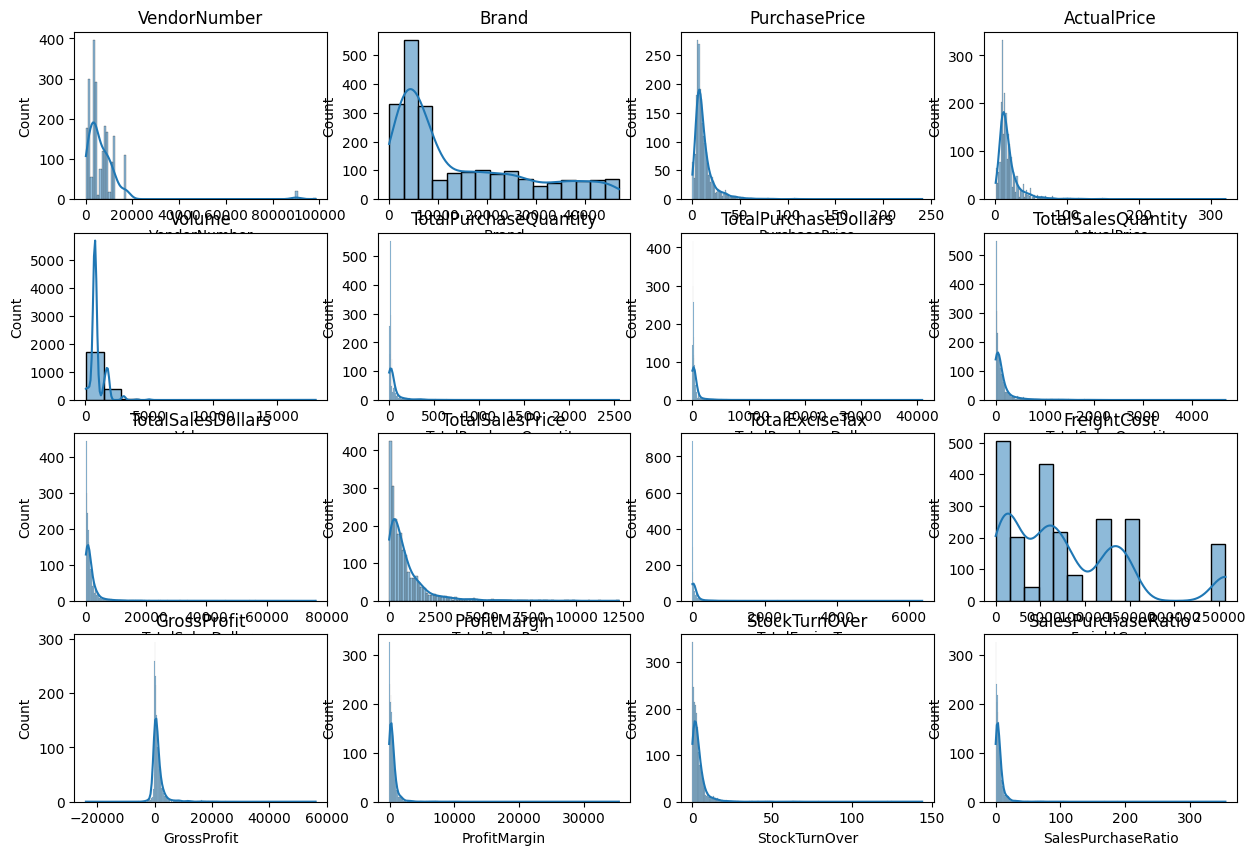

In [77]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout
plt.show()

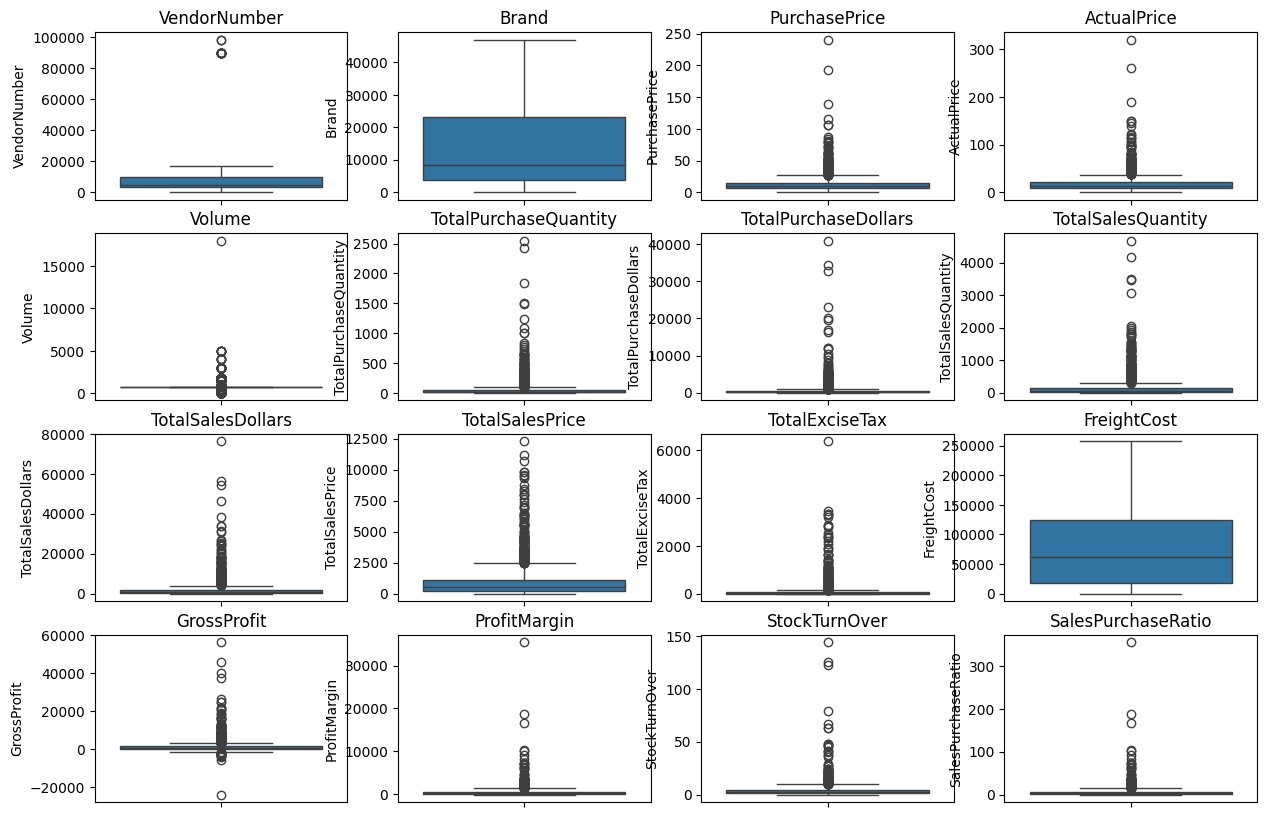

In [78]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout
plt.show()

In [79]:
df=pd.read_sql_query('SELECT * FROM vendor_sales_summary where GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0', conn)

In [80]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69,3.207349,0.764483,1.032073
1,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83,65.253241,1.277834,1.652532
2,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37,279.814890,2.792909,3.798149
3,3960.0,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,772.0,16899.08,1806.0,54427.94,9778.76,3318.30,257032.07,37528.86,222.076350,2.339378,3.220763
4,3252.0,E & J GALLO WINERY,3180,New Amsterdam Vodka,10.94,16.99,1750.0,1496.0,16366.24,1206.0,18131.94,4518.01,2215.74,61966.91,1765.70,10.788672,0.806150,1.107887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,3960.0,DIAGEO NORTH AMERICA INC,3607,Smirnoff Citrus Vodka,0.72,0.99,50.0,9.0,6.48,1099.0,1088.01,204.93,57.39,257032.07,1081.53,16690.277778,122.111111,167.902778
1787,12546.0,JIM BEAM BRANDS COMPANY,8172,DK Burst Blustery Peppermint,0.71,0.99,50.0,9.0,6.39,602.0,595.98,135.63,31.48,123880.97,589.59,9226.760563,66.888889,93.267606
1788,8004.0,SAZERAC CO INC,5877,Ryans Irish Cream,0.62,0.99,50.0,9.0,5.58,568.0,562.32,158.40,29.55,50293.62,556.74,9977.419355,63.111111,100.774194
1789,3960.0,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50.0,7.0,5.53,111.0,109.89,39.60,5.74,257032.07,104.36,1887.160940,15.857143,19.871609


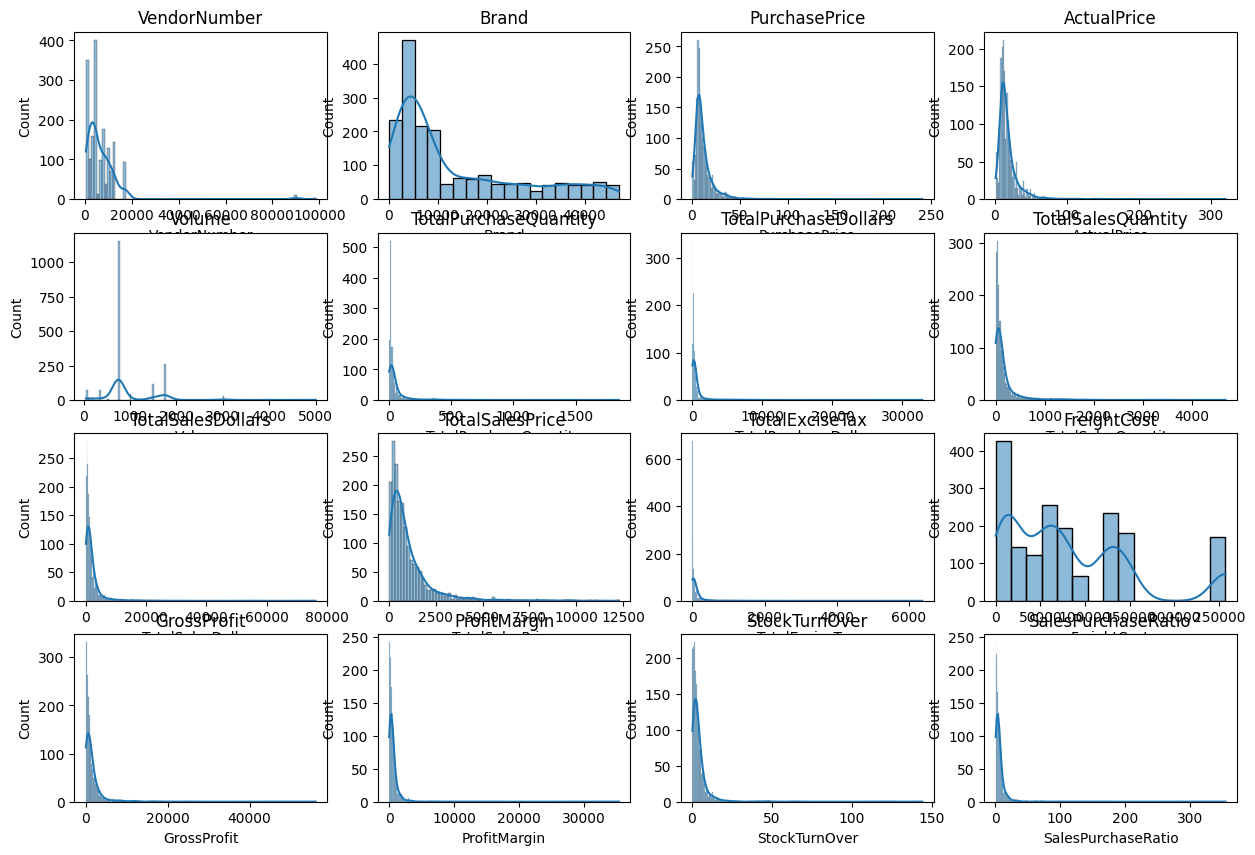

In [81]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout
plt.show()

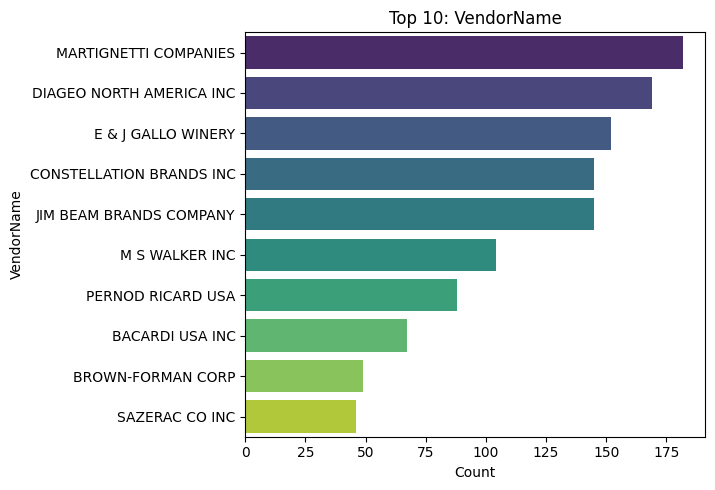

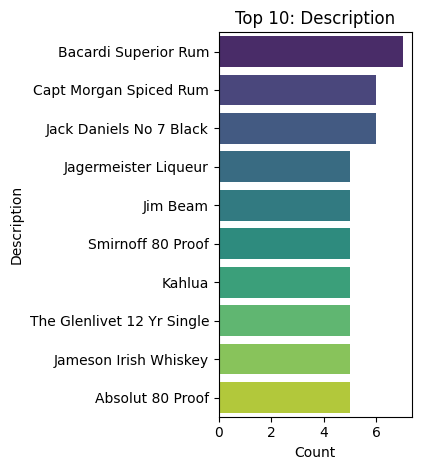

In [82]:
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    top_10 = df[col].value_counts().head(10)
    sns.barplot(x=top_10.values, y=top_10.index, hue=top_10.index, palette="viridis", legend=False)

    plt.title(f"Top 10: {col}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

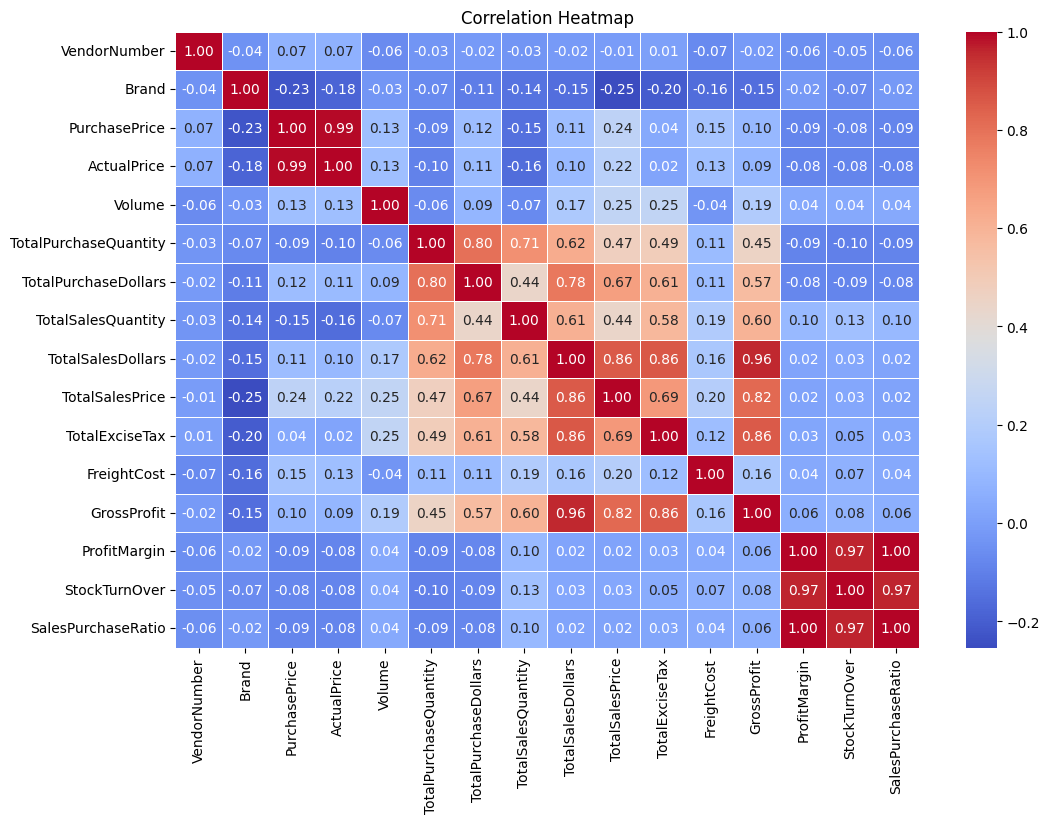

In [83]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show

In [84]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()

In [85]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [86]:
low_sales_threshold

np.float64(299.75000000000006)

In [87]:
high_margin_threshold

np.float64(891.4706199950526)

In [88]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) & (brand_performance ['ProfitMargin'] >= high_margin_threshold)]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
805,Kamora Coffee Gift Pack,79.92,1019.327731
1266,Smirnoff Peppermint Twist,109.89,1887.160940
191,Bolla Prosecco Extra Dry,115.90,1523.249300
1475,Yellow Tail Bubbles White,209.79,2985.147059
818,Kenwood J London Cab Svgn,249.92,1519.701879
396,Cointreau Noir Liqueur,255.92,979.831224


In [89]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

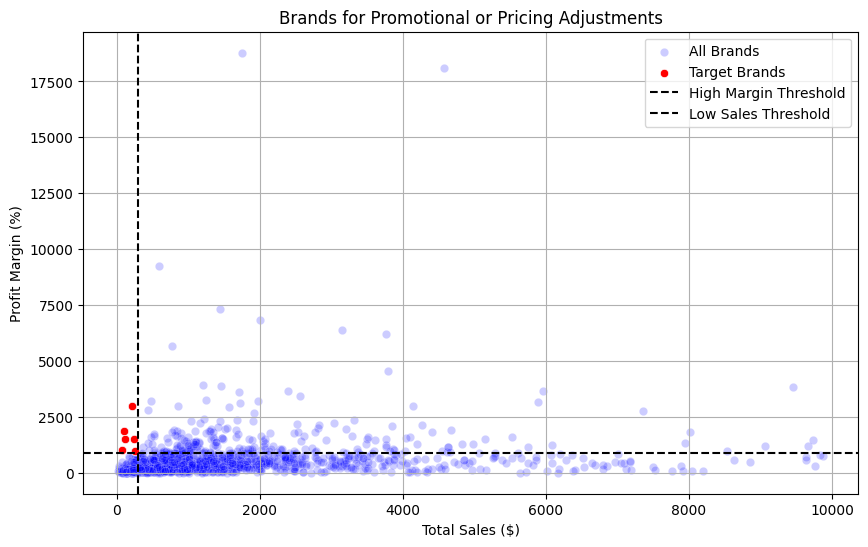

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
def format_dollars(value):
  if value >= 1000000:
    return f"${value/1000000:.2f}M"
  elif value >= 1000:
    return f"${value/1000:.2f}K"
  else:
    return str(value)

In [92]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,669467.62
JIM BEAM BRANDS COMPANY,362830.35
PERNOD RICARD USA,316269.86
MARTIGNETTI COMPANIES,306539.13
CONSTELLATION BRANDS INC,264035.14
E & J GALLO WINERY,223577.62
BACARDI USA INC,212846.68
BROWN-FORMAN CORP,200781.29
M S WALKER INC,152518.22


In [93]:
top_brands

,TotalSalesDollars
Description,
Capt Morgan Spiced Rum,107709.69
Jack Daniels No 7 Black,92830.55
Absolut 80 Proof,68904.30
Jameson Irish Whiskey,68005.80
Grey Goose Vodka,64399.77
Ketel One Vodka,63311.49
Tito's Handmade Vodka,57336.67
Jim Beam,46846.19
Kahlua,45589.21


In [94]:
top_brands.apply(lambda x: format_dollars(x))

,TotalSalesDollars
Description,
Capt Morgan Spiced Rum,$107.71K
Jack Daniels No 7 Black,$92.83K
Absolut 80 Proof,$68.90K
Jameson Irish Whiskey,$68.01K
Grey Goose Vodka,$64.40K
Ketel One Vodka,$63.31K
Tito's Handmade Vodka,$57.34K
Jim Beam,$46.85K
Kahlua,$45.59K


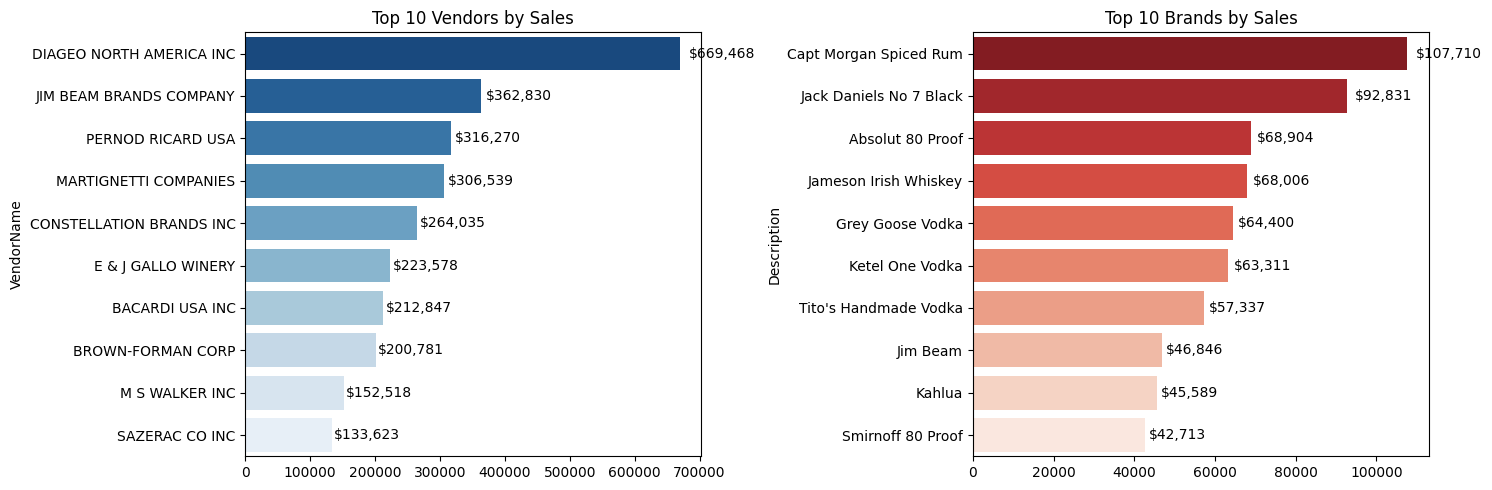

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to format numbers as currency (previously missing)
def format_dollars(value):
    return f'${value:,.0f}'

plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
# Added 'hue' and set 'legend=False' to satisfy newer Seaborn requirements
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, hue=top_vendors.index, palette="Blues_r", legend=False)
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
# Converted index to string to ensure categorical plotting
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, hue=top_brands.index.astype(str), palette="Reds_r", legend=False)
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [105]:
df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum','GrossProfit':'sum','TotalSalesDollars':'sum'}).reset_index()
vendor_performance.shape

(65, 5)

In [165]:
vendor_performance = df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum','GrossProfit':'sum','TotalSalesDollars':'sum'}).reset_index()
vendor_performance.shape

(65, 4)

In [171]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [172]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [173]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%
16,DIAGEO NORTH AMERICA INC,"$148,904","$520,564","$669,468",15.92,15.92
39,MARTIGNETTI COMPANIES,"$97,437","$209,102","$306,539",10.42,10.42
29,JIM BEAM BRANDS COMPANY,"$88,359","$274,471","$362,830",9.45,9.45
48,PERNOD RICARD USA,"$72,300","$243,970","$316,270",7.73,7.73
2,BACARDI USA INC,"$70,470","$142,377","$212,847",7.53,7.53
5,BROWN-FORMAN CORP,"$59,543","$141,239","$200,781",6.37,6.37
12,CONSTELLATION BRANDS INC,"$54,651","$209,384","$264,035",5.84,5.84
20,E & J GALLO WINERY,"$53,350","$170,228","$223,578",5.70,5.70
57,SAZERAC CO INC,"$32,509","$101,113","$133,623",3.48,3.48
53,PROXIMO SPIRITS INC.,"$32,448","$85,443","$117,892",3.47,3.47


In [174]:
top_vendors['PurchaseContribution%'].sum()

np.float64(75.91)

In [175]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%,Cumulative_Contribution%
16,DIAGEO NORTH AMERICA INC,"$148,904","$520,564","$669,468",15.92,15.92,15.92
39,MARTIGNETTI COMPANIES,"$97,437","$209,102","$306,539",10.42,10.42,26.34
29,JIM BEAM BRANDS COMPANY,"$88,359","$274,471","$362,830",9.45,9.45,35.79
48,PERNOD RICARD USA,"$72,300","$243,970","$316,270",7.73,7.73,43.52
2,BACARDI USA INC,"$70,470","$142,377","$212,847",7.53,7.53,51.05
5,BROWN-FORMAN CORP,"$59,543","$141,239","$200,781",6.37,6.37,57.42
12,CONSTELLATION BRANDS INC,"$54,651","$209,384","$264,035",5.84,5.84,63.26
20,E & J GALLO WINERY,"$53,350","$170,228","$223,578",5.70,5.70,68.96
57,SAZERAC CO INC,"$32,509","$101,113","$133,623",3.48,3.48,72.44
53,PROXIMO SPIRITS INC.,"$32,448","$85,443","$117,892",3.47,3.47,75.91


In [176]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%,Cumulative_Contribution%
16,DIAGEO NORTH AMERICA INC,"$148,904","$520,564","$669,468",15.92,15.92,15.92
39,MARTIGNETTI COMPANIES,"$97,437","$209,102","$306,539",10.42,10.42,26.34
29,JIM BEAM BRANDS COMPANY,"$88,359","$274,471","$362,830",9.45,9.45,35.79
48,PERNOD RICARD USA,"$72,300","$243,970","$316,270",7.73,7.73,43.52
2,BACARDI USA INC,"$70,470","$142,377","$212,847",7.53,7.53,51.05
5,BROWN-FORMAN CORP,"$59,543","$141,239","$200,781",6.37,6.37,57.42
12,CONSTELLATION BRANDS INC,"$54,651","$209,384","$264,035",5.84,5.84,63.26
20,E & J GALLO WINERY,"$53,350","$170,228","$223,578",5.70,5.70,68.96
57,SAZERAC CO INC,"$32,509","$101,113","$133,623",3.48,3.48,72.44
53,PROXIMO SPIRITS INC.,"$32,448","$85,443","$117,892",3.47,3.47,75.91


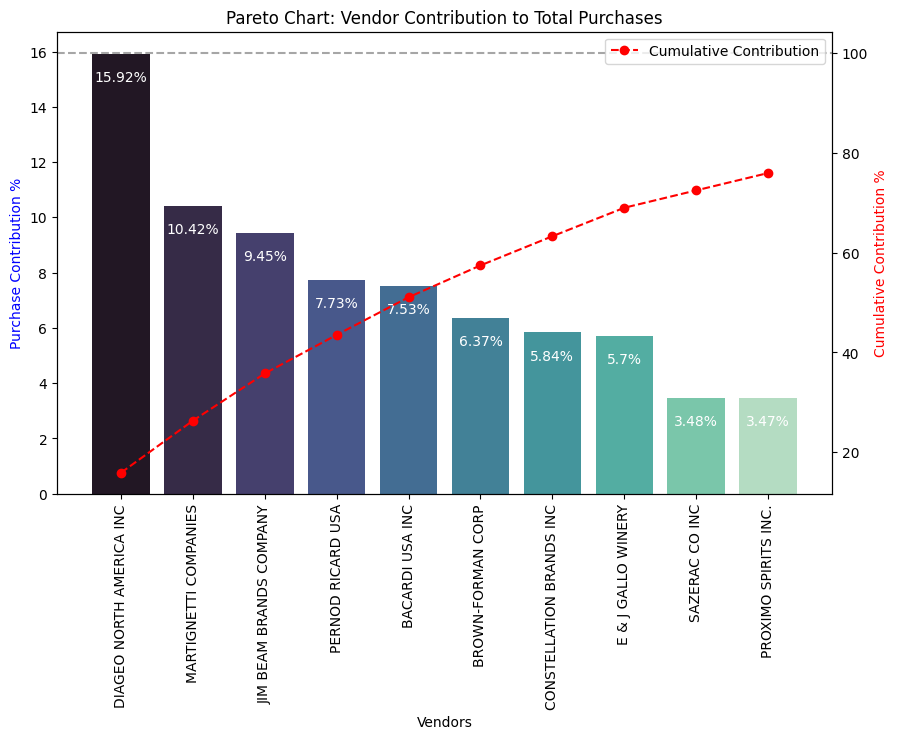

In [177]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Individual Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1,)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution'
)

# Axis Formatting
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')


plt.show()

In [178]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 75.91 %


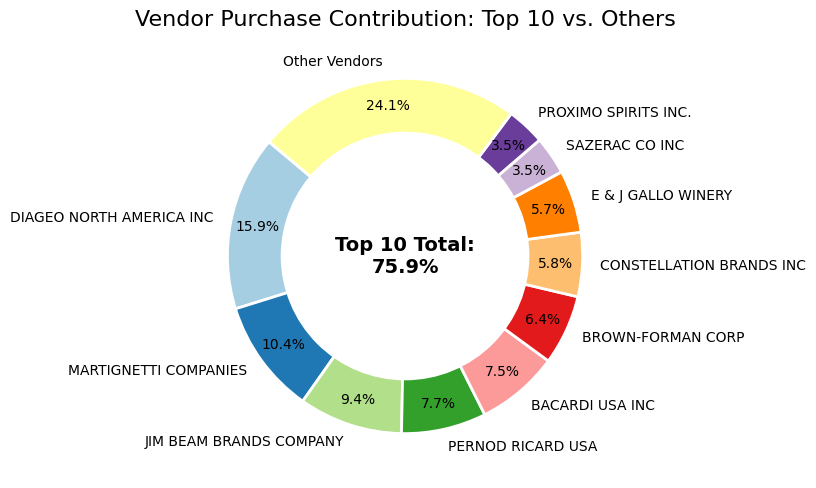

In [179]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

# 2. Calculate the "Other Vendors" slice
# This represents the remaining portion of the 100% total spend
total_top_10_contribution = sum(purchase_contributions)
remaining_contribution = max(0, 100 - total_top_10_contribution) # Ensure no negative values

# Append the "Other" category to your lists
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# 3. Generate the Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2} # Adds separation between slices
)

# 4. Create the "Donut" hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 5. Add the Center Annotation
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_top_10_contribution:.1f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Vendor Purchase Contribution: Top 10 vs. Others", fontsize=16)
plt.tight_layout()
plt.show()

In [180]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,UnitPurchasePrice
0,480.0,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,1847.0,32821.19,1412.0,33873.88,7964.68,1111.71,89286.27,1052.69,3.207349,0.764483,1.032073,17.77
1,4425.0,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,997.0,23120.43,1274.0,38207.26,9596.80,2340.71,144929.24,15086.83,65.253241,1.277834,1.652532,23.19
2,3960.0,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1241.0,20066.97,3466.0,76217.34,8268.24,6368.57,257032.07,56150.37,279.814890,2.792909,3.798149,16.17
3,3960.0,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,772.0,16899.08,1806.0,54427.94,9778.76,3318.30,257032.07,37528.86,222.076350,2.339378,3.220763,21.89
4,3252.0,E & J GALLO WINERY,3180,New Amsterdam Vodka,10.94,16.99,1750.0,1496.0,16366.24,1206.0,18131.94,4518.01,2215.74,61966.91,1765.70,10.788672,0.806150,1.107887,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,3960.0,DIAGEO NORTH AMERICA INC,3607,Smirnoff Citrus Vodka,0.72,0.99,50.0,9.0,6.48,1099.0,1088.01,204.93,57.39,257032.07,1081.53,16690.277778,122.111111,167.902778,0.72
1787,12546.0,JIM BEAM BRANDS COMPANY,8172,DK Burst Blustery Peppermint,0.71,0.99,50.0,9.0,6.39,602.0,595.98,135.63,31.48,123880.97,589.59,9226.760563,66.888889,93.267606,0.71
1788,8004.0,SAZERAC CO INC,5877,Ryans Irish Cream,0.62,0.99,50.0,9.0,5.58,568.0,562.32,158.40,29.55,50293.62,556.74,9977.419355,63.111111,100.774194,0.62
1789,3960.0,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50.0,7.0,5.53,111.0,109.89,39.60,5.74,257032.07,104.36,1887.160940,15.857143,19.871609,0.79


In [182]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3,labels=["Small", "Medium", "Large"])

In [185]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,1847.0
1,Large,997.0
2,Large,1241.0
3,Large,772.0
4,Large,1496.0
...,...,...
1786,Small,9.0
1787,Small,9.0
1788,Small,9.0
1789,Small,7.0


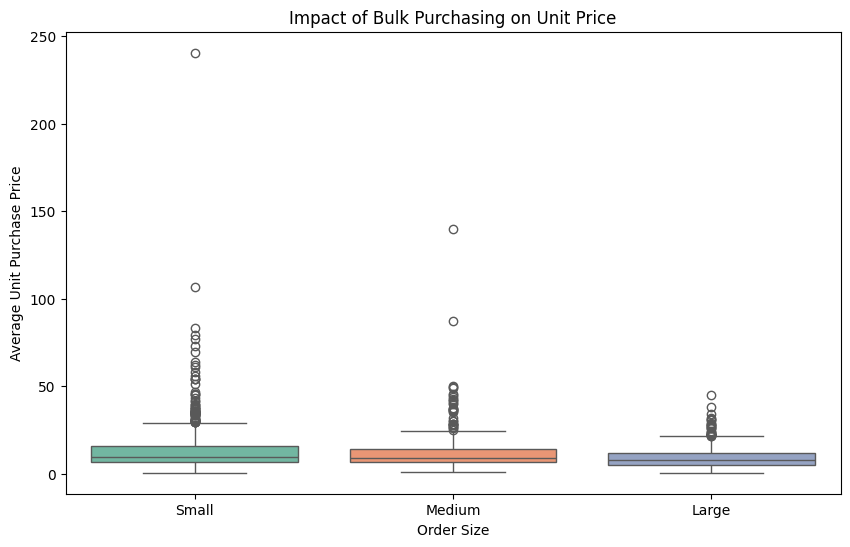

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [191]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)


,StockTurnOver
VendorName,
PALM BAY INTERNATIONAL INC,0.533333
KOBRAND CORPORATION,0.705882
LATITUDE BEVERAGE COMPANY,0.722222
CRUSH WINES,0.750000
LUXCO INC,0.750000
MOONLIGHT MEADERY,0.750000
BANFI PRODUCTS CORP,0.765627
PERFECTA WINES,0.766667
PINE STATE TRADING CO,0.770518


In [195]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: $-1,620,797


In [196]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
9,CANDIA VINEYARDS,$77
43,MOONLIGHT MEADERY,$29
45,OLE SMOKY DISTILLERY LLC,$16
24,FORTUNE WINE BROKERS LLC,$0
6,BULLY BOY DISTILLERS,$-44
18,DJINN SPIRITS LLC,$-50
27,"HOOD RIVER DISTILLERS, Inc.",$-65
4,BLACK PRINCE DISTILLERY INC,$-102
23,FLAG HILL WINERY & VINEYARD,$-145
51,POVERTY LANE ORCHARDS,$-201


In [198]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [199]:
top_vendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()
#

In [200]:
top_vendors

,ProfitMargin
0,3.207349
1,65.253241
2,279.814890
3,222.076350
4,10.788672
...,...
1605,4772.161671
1617,3651.902897
1683,6380.992586
1685,7049.834163


In [201]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (657.30, 825.80), Mean: 741.55
Low Vendors 95% CI: (226.40, 312.14), Mean: 269.27


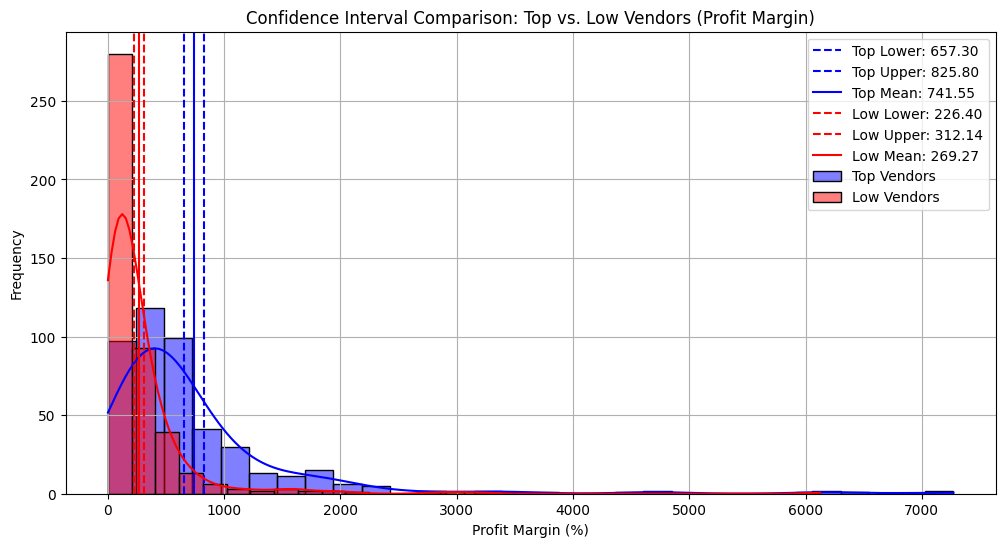

In [202]:
 top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [203]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")


T-Statistic: 9.8185, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
